# Evaluation Metrics for Classification
Previously, we trained a model for predicting churn, but how do we know if it's good?

*Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are*

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [44]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [45]:
df = pd.read_csv(data)

In [46]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [47]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values 
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [48]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [49]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Jo$h\Desktop\Visual Studio Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.794180269694819)

### Accuracy and Dummy Model
- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines
- Basically, answering the question if the above accuracy score is good or not

In [51]:
len(y_val)

1409

In [52]:
(y_val == churn_decision).mean()

np.float64(0.794180269694819)

In [53]:
1119 / 1409 

0.794180269694819

In [54]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)
    print(f'threshold={t:.2f} accuracy={score:.3f}')

threshold=0.00 accuracy=0.260
threshold=0.05 accuracy=0.476
threshold=0.10 accuracy=0.581
threshold=0.15 accuracy=0.644
threshold=0.20 accuracy=0.688
threshold=0.25 accuracy=0.724
threshold=0.30 accuracy=0.752
threshold=0.35 accuracy=0.767
threshold=0.40 accuracy=0.785
threshold=0.45 accuracy=0.793
threshold=0.50 accuracy=0.794
threshold=0.55 accuracy=0.798
threshold=0.60 accuracy=0.790
threshold=0.65 accuracy=0.789
threshold=0.70 accuracy=0.777
threshold=0.75 accuracy=0.764
threshold=0.80 accuracy=0.751
threshold=0.85 accuracy=0.741
threshold=0.90 accuracy=0.740
threshold=0.95 accuracy=0.740
threshold=1.00 accuracy=0.740


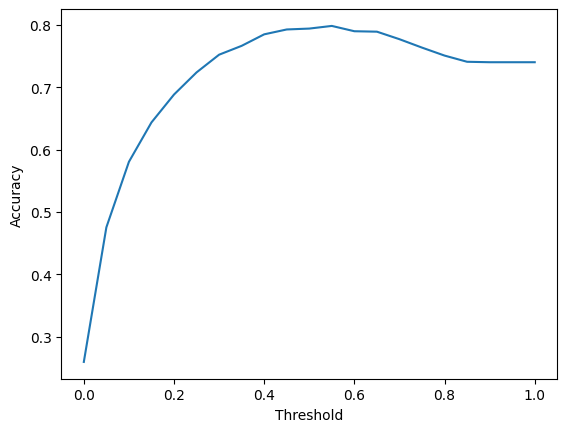

In [55]:
plt.plot(thresholds, scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

We could use this manual function or user sklearn (accuracy_score) instead 

In [56]:
# already imported above

accuracy_score(y_val, y_pred >= 0.5)

0.794180269694819

In [57]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)
    print(f'threshold={t:.2f} accuracy={score:.3f}')

threshold=0.00 accuracy=0.260
threshold=0.05 accuracy=0.476
threshold=0.10 accuracy=0.581
threshold=0.15 accuracy=0.644
threshold=0.20 accuracy=0.688
threshold=0.25 accuracy=0.724
threshold=0.30 accuracy=0.752
threshold=0.35 accuracy=0.767
threshold=0.40 accuracy=0.785
threshold=0.45 accuracy=0.793
threshold=0.50 accuracy=0.794
threshold=0.55 accuracy=0.798
threshold=0.60 accuracy=0.790
threshold=0.65 accuracy=0.789
threshold=0.70 accuracy=0.777
threshold=0.75 accuracy=0.764
threshold=0.80 accuracy=0.751
threshold=0.85 accuracy=0.741
threshold=0.90 accuracy=0.740
threshold=0.95 accuracy=0.740
threshold=1.00 accuracy=0.740


In [58]:
# counting where y_pred >= 1.0

Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [59]:
Counter(y_val) # distribution

Counter({np.int64(0): 1043, np.int64(1): 366})

In [65]:
print(y_val.mean(), 'of users are churning')

print(1 - y_val.mean(), 'of users are not churning')

print("=" * 120)
print("This is a Class Imbalance problem because: the proportion of churned users is very low compared to non-churned users.")
print("=" * 120)

0.25975869410929736 of users are churning
0.7402413058907027 of users are not churning
This is a Class Imbalance problem because: the proportion of churned users is very low compared to non-churned users.


In [ ]:
# in this case, if we use the threshold of 1.0 and predict that all users are churning, our accuracy will be equal to the proportion of non-churning users in the validation set.

# accuracy alone in cases of class imbalance is not sufficient to evaluate model performance.